In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [4]:
df = pd.read_csv('dataset_1_train.txt')

In [5]:
df.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [6]:
Xtrain = df.TimeMin.values.reshape(-1,1)

In [7]:
ytrain = df.PickupCount.values

In [8]:
for i in range(250):
    Xtrain[i]/=1440


In [9]:
df = pd.read_csv('dataset_1_test.txt')
Xtest = df.TimeMin.values.reshape(-1,1)
ytest = df.PickupCount.values
for i in range(1000):
    Xtest[i]/=1440



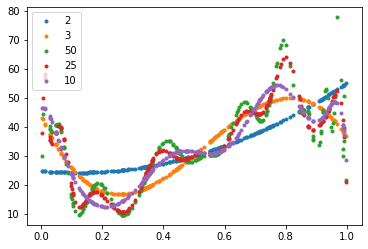

In [10]:
test_score= []
train_score=[]
for d in set({2,3,10,25,50}):
    Xnew_train = PolynomialFeatures(d).fit_transform(Xtrain.reshape(-1,1))
    Xnew_test = PolynomialFeatures(d).fit_transform(Xtest.reshape(-1,1))
    lr = LinearRegression()
    lr.fit(Xnew_train,ytrain)
    ypred_train = lr.predict(Xnew_train)
    ypred_test = lr.predict(Xnew_test)
    train_score.append(r2_score(ytrain,lr.predict(Xnew_train)))
    test_score.append(r2_score(ytest,lr.predict(Xnew_test)))
    #plt.plot(Xtest,ypred_test,'.',label = d)
    #plt.legend(loc = 2)
    plt.plot(Xtrain,ypred_train,'.',label = d)
    plt.legend(loc = 2)
#plt.plot(Xtest,ytest,'.')    
    

In [73]:
np.argmax(train_score)

2

In [74]:
train_score[2]

0.4810776335173875

In [75]:
np.argmax(test_score)

4

In [76]:
test_score

[0.25572414216191586,
 0.37858436224816694,
 0.27993505166852206,
 0.39400975075773925,
 0.40200780068092656]

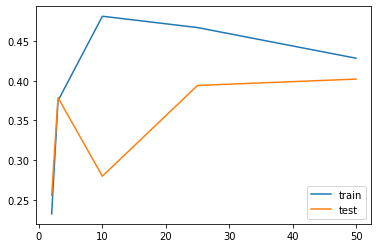

In [83]:
plt.plot(list,train_score,label = 'train')
plt.plot(list,test_score,label = 'test')
plt.legend(loc=4)
